### Data Stream Implementation (Generators)
#### Part 2 Uses citibike.csv file

In [1]:
import pandas as pd
import seaborn as sns 
import csv
import matplotlib as plt
import dateutil
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
sizes = list(tips['size']).__iter__()

In [5]:
count = {}
for i in sizes:
    count[i] = count.get(i,0)+1 

In [6]:
count

{1: 4, 2: 156, 3: 38, 4: 37, 5: 5, 6: 4}

In [1]:
data = {'size': count.keys(), 'count': count.values()}
df = pd.DataFrame.from_dict(count, 'index')
df2 = pd.DataFrame.from_dict(data)

NameError: name 'count' is not defined

In [8]:
df2

,count,size
0,4,1
1,156,2
2,38,3
3,37,4
4,5,5
5,4,6


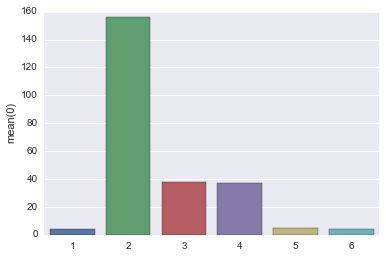

In [9]:
sns.barplot(x=df.index, y=df[0])

In [10]:
total = df[0].sum()
curSum = 0
median = None
for k,v in sorted(count.iteritems()):
    curSum += v
    if curSum>=total/2.0:
        median = k
        break

In [11]:
print median

2


C:\Users\Alan\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


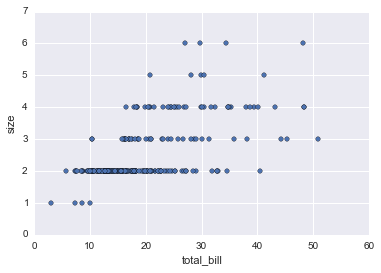

In [12]:
tips.plot(x='total_bill',y='size',kind='scatter')

In [13]:
bill_size=tips[['total_bill','size']]

In [14]:
def data_stream(bill_size,chunk_size=50):
    #print range(0,len(bill_size),chunk size)
    for i in xrange(0,len(bill_size),chunk_size):
        yield bill_size[i:i+chunk_size]
        
g = data_stream(bill_size, 50)

In [15]:
g

<generator object data_stream at 0x000000001C7EC318>

In [16]:
for chunk in g:
    print chunk
    break
    
#alternative to this is
#g.next() 
#but this will give an error when the end comes

    total_bill  size
0        16.99     2
1        10.34     3
2        21.01     3
3        23.68     2
4        24.59     4
5        25.29     4
6         8.77     2
7        26.88     4
8        15.04     2
9        14.78     2
10       10.27     2
11       35.26     4
12       15.42     2
13       18.43     4
14       14.83     2
15       21.58     2
16       10.33     3
17       16.29     3
18       16.97     3
19       20.65     3
20       17.92     2
21       20.29     2
22       15.77     2
23       39.42     4
24       19.82     2
25       17.81     4
26       13.37     2
27       12.69     2
28       21.70     2
29       19.65     2
30        9.55     2
31       18.35     4
32       15.06     2
33       20.69     4
34       17.78     2
35       24.06     3
36       16.31     3
37       16.93     3
38       18.69     3
39       31.27     3
40       16.04     3
41       17.46     2
42       13.94     2
43        9.68     2
44       30.40     4
45       18.29     2
46       22.2

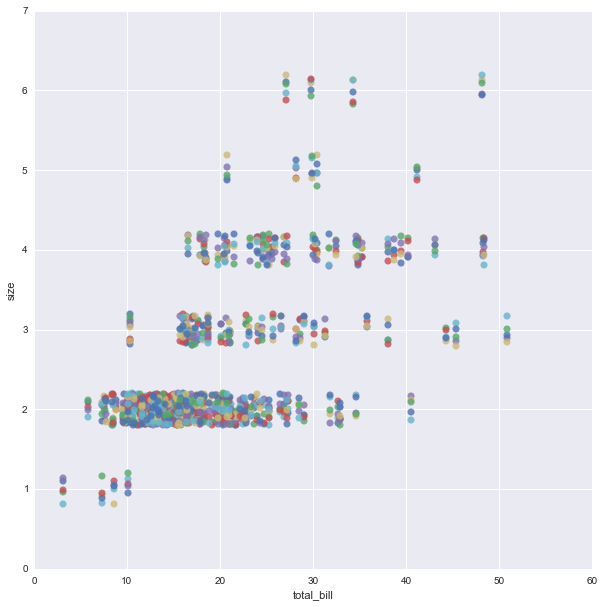

In [17]:
fig,ax = plt.subplots(figsize = (10,10))
for c in data_stream(bill_size,chunk_size=50):
    for i in data_stream(bill_size,50):
        sns.regplot(x='total_bill', y='size',data=c,fit_reg=False,y_jitter=0.2, 
                    scatter_kws={'s':50})
#        c.plot(x="total_bill",y="size",kind="scatter", ax=ax,c=color[])

### Part 2

In [18]:
with open('citibike.csv','r') as fi:
    reader = csv.DictReader(fi)
    for row in reader:
        #print row
        starttime = dateutil.parser.parse(row['starttime'])
        #print starttime.hour, startime.weekday
        print starttime.hour
        break

1


In [19]:
def citibike_hod(filename):
    with open(filename,'r') as fi:
        reader = csv.DictReader(fi)
        for row in reader:
            starttime = dateutil.parser.parse(row['starttime'])
            yield starttime.hour

In [20]:
g= citibike_hod('citibike.csv')

In [21]:
count = {}
for hod in g:
    count[hod] = count.get(hod,0)+1

In [22]:
count

{0: 401,
 1: 248,
 2: 117,
 3: 89,
 4: 89,
 5: 293,
 6: 988,
 7: 2037,
 8: 3668,
 9: 3108,
 10: 2241,
 11: 2090,
 12: 2289,
 13: 2443,
 14: 2685,
 15: 2856,
 16: 3471,
 17: 4788,
 18: 4270,
 19: 2839,
 20: 1844,
 21: 1343,
 22: 1192,
 23: 811}

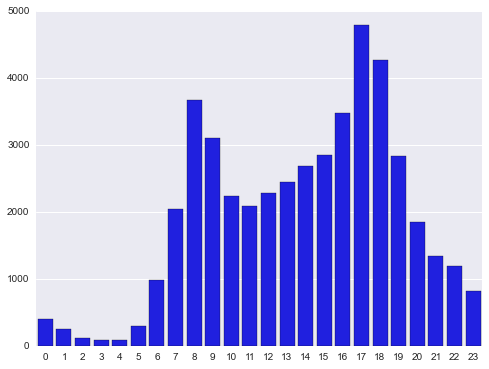

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x=count.keys(),y=count.values(),color='b')